## Moment Tensor Inversion using `tdmtpy`

Now we can start the inversion using the input file we created.


In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../src'))

import tdmtpy
%matplotlib inline

from IPython.display import Image # to display image files inside the Jupyter notebook

#### Let's take a look at mtinv.in

```
datetime       2019-07-16T20:11:01.470000Z
longitude      -121.7568
latitude       37.8187
depth          10.0000,12.0000,20.0000
path_to_data   40191336
path_to_green  40191336/gil7
green          herrmann
components     ZRT
degree         5
weight         distance
plot           1
correlate      0
    station  distance  azimuth  ts  npts   dt  used  longitude  latitude
 BK.QRDG.00     80.99   335.29  30   150 1.00     1    -122.14     38.48
 BK.RUSS.00     81.16   353.18  30   150 1.00     1    -121.87     38.54
  BK.CVS.00     84.88   313.73  30   150 1.00     1    -122.46     38.35
 BK.OAKV.00     88.89   320.02  30   150 1.00     1    -122.41     38.43
 BK.MCCM.00    105.12   290.48  30   150 1.00     1    -122.88     38.14
 BK.FARB.00    110.46   263.41  30   150 1.00     1    -123.00     37.70
 BK.WELL.00    113.71    52.46  30   150 1.00     1    -120.72     38.44
  BK.SAO.00    120.23   166.71  30   150 1.00     1    -121.45     36.76
  BK.CMB.00    122.83    78.33  30   150 1.00     1    -120.39     38.03
 BK.MNRC.00    132.06   333.21  30   150 1.00     1    -122.44     38.88
  BK.SCZ.00    139.07   166.84  30   150 1.00     1    -121.40     36.60
 BK.BUCR.00    142.56    96.01  30   150 1.00     1    -120.15     37.67
```

In [ ]:
# Call the Configure object to read the input file and set up the inversion
config = tdmtpy.Configure(path_to_file="mtinv.in")

# Quick look at the attributes
print(config)

In [ ]:
# Pass the parameters to the Inversion object and launch the inversion
# The default is to plot all solutions
tdmt = tdmtpy.Inversion(config=config)
tdmt.invert()

In [ ]:
# You can display the png image files here
Image(filename="bbwaves.d10.0000.00.png")

changed order!!



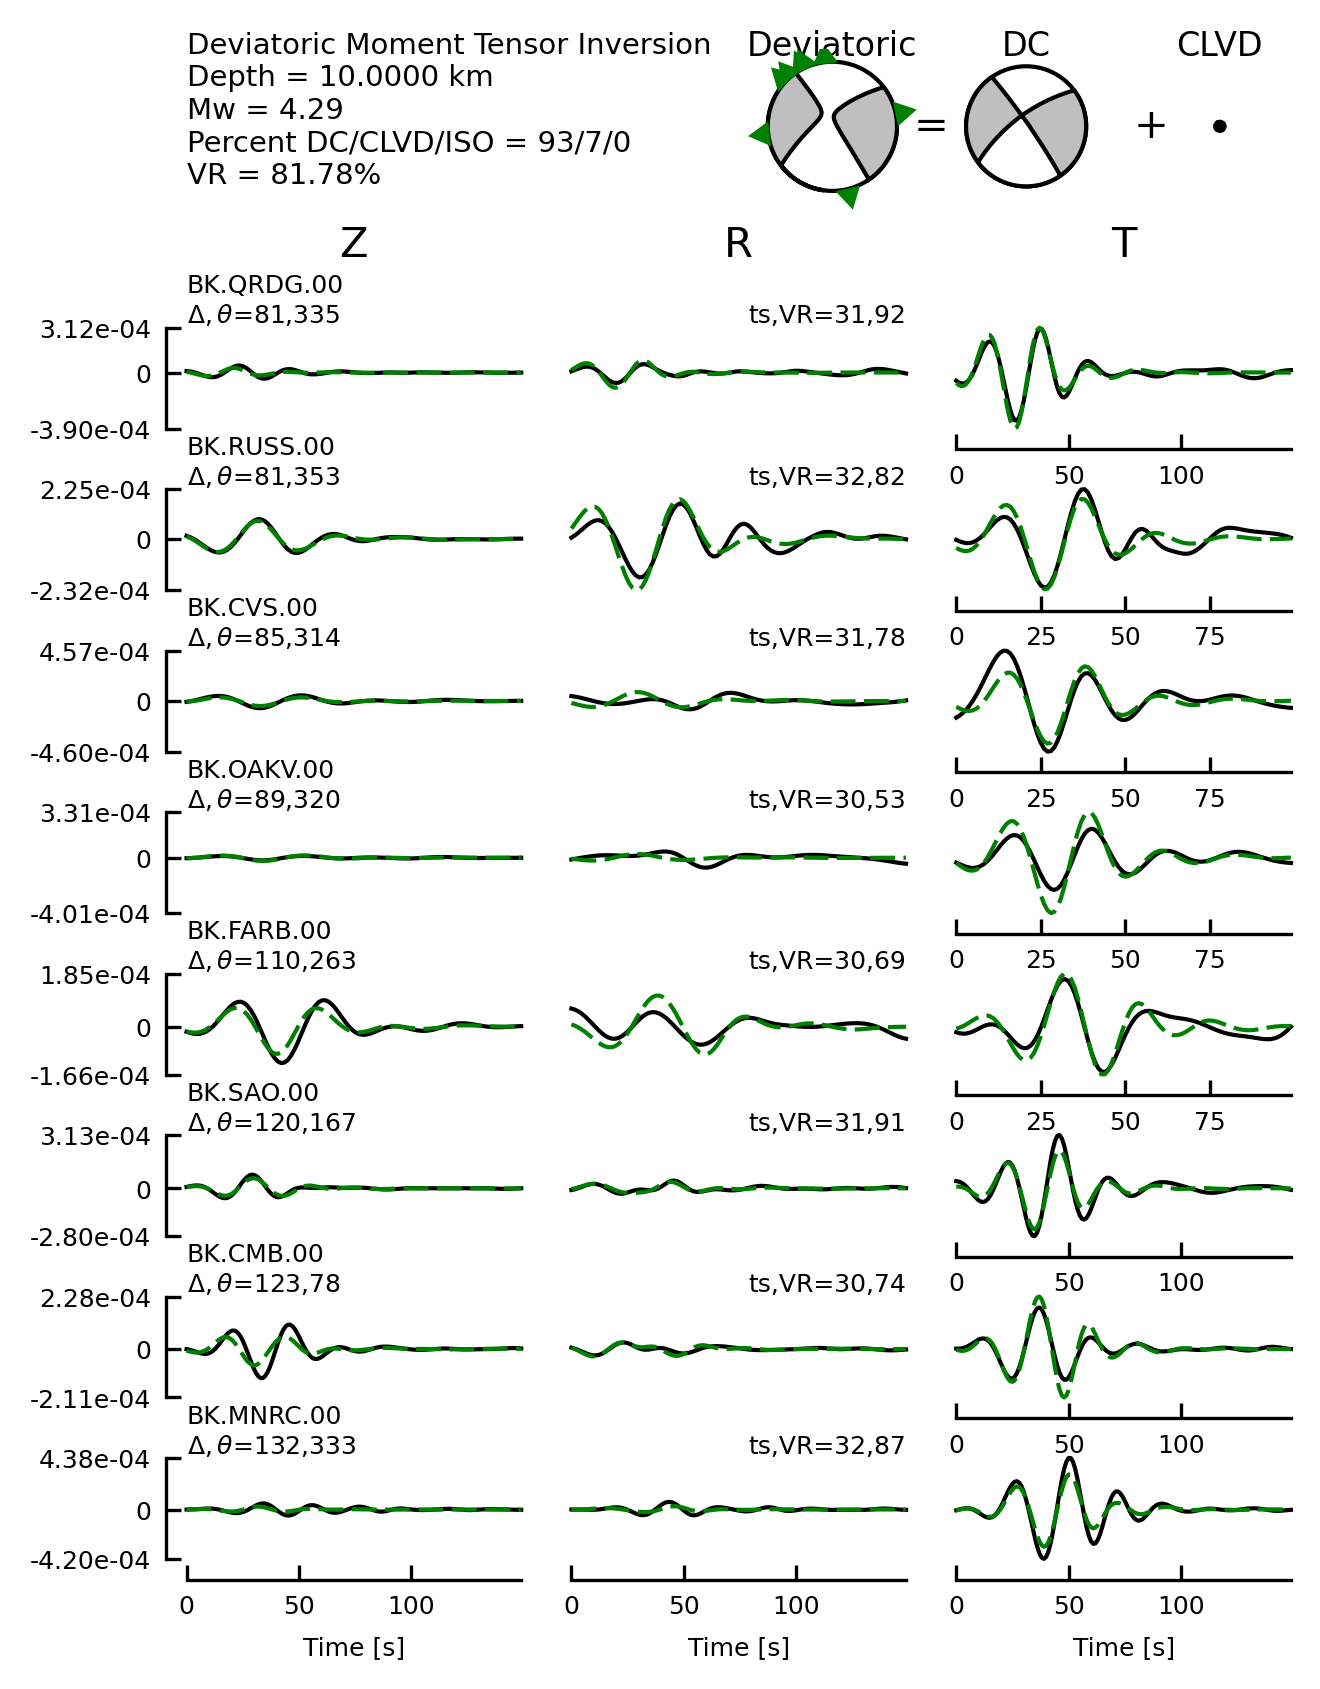

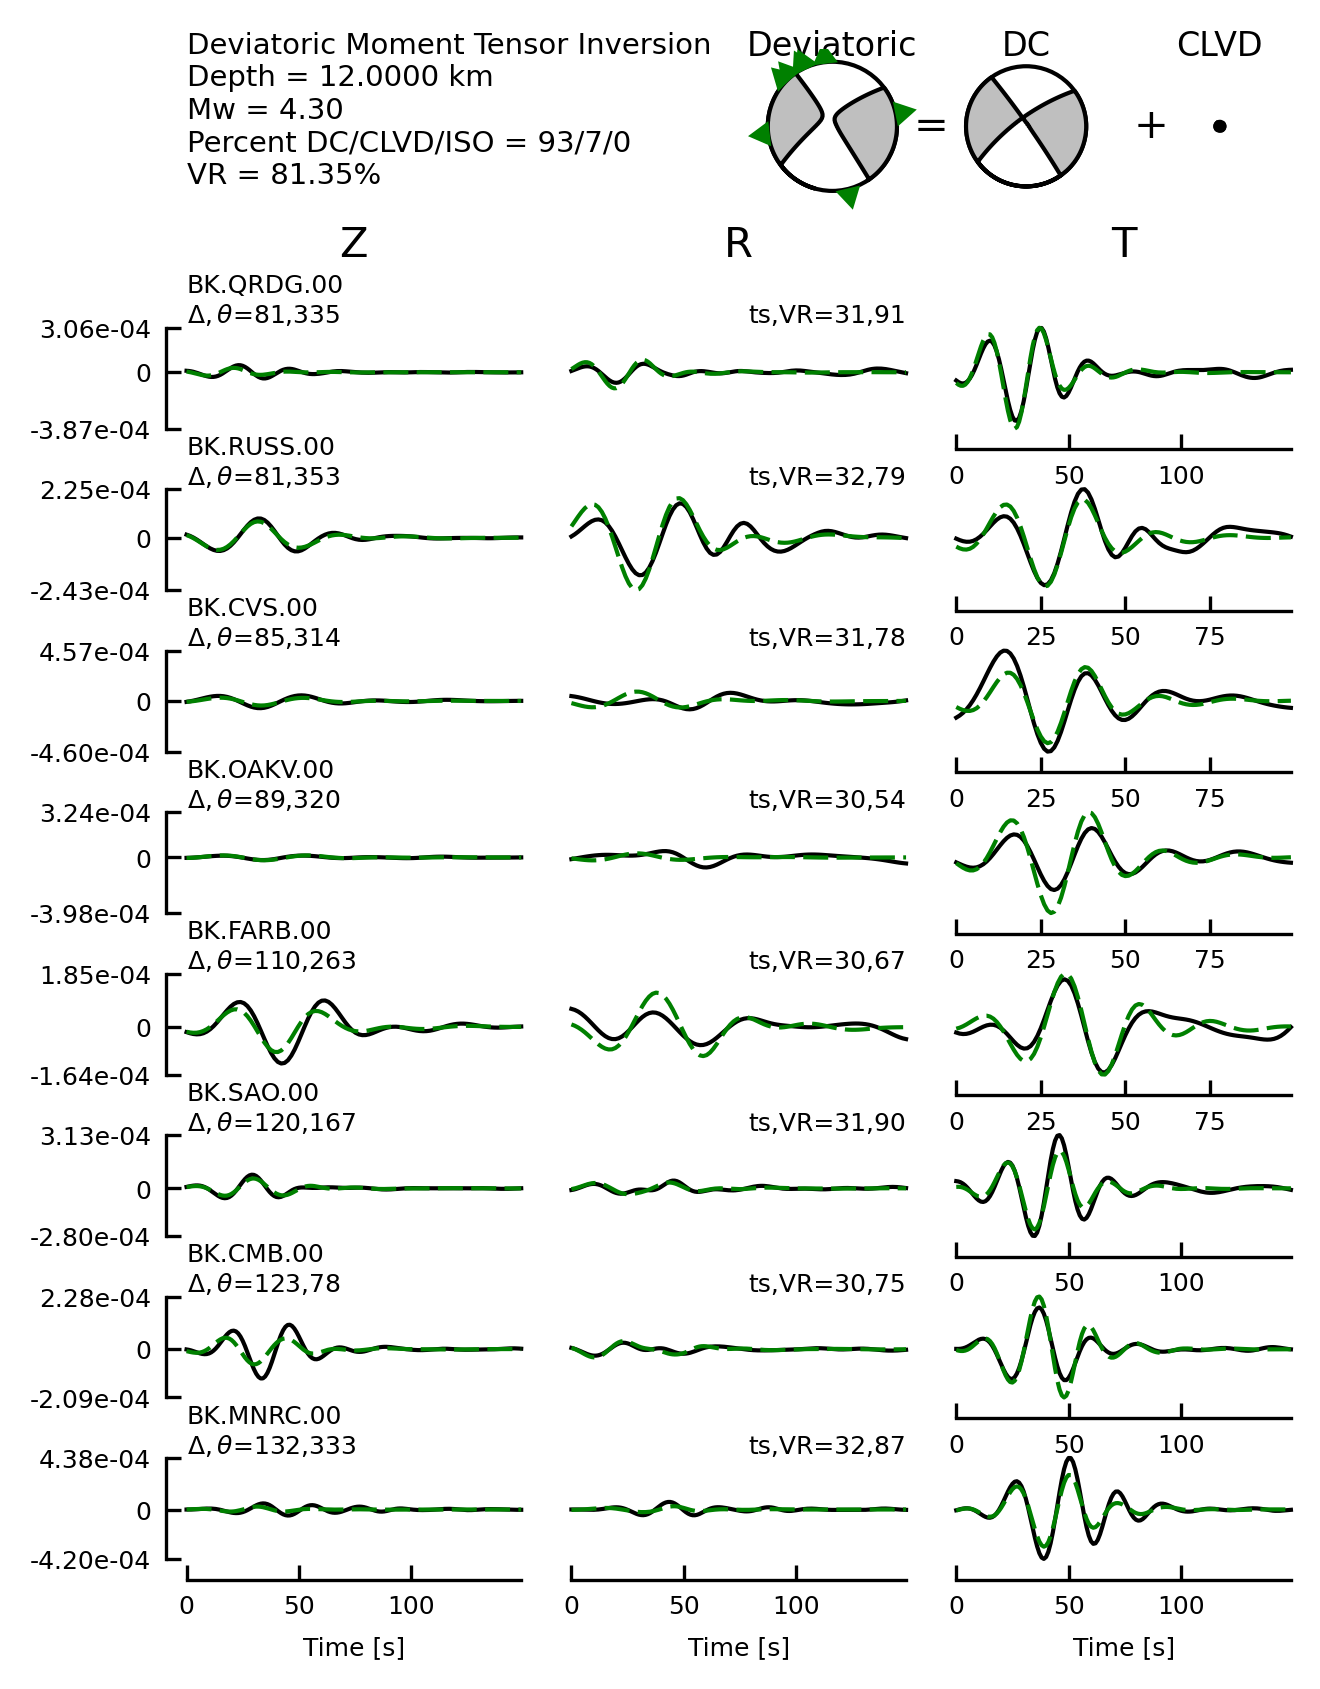

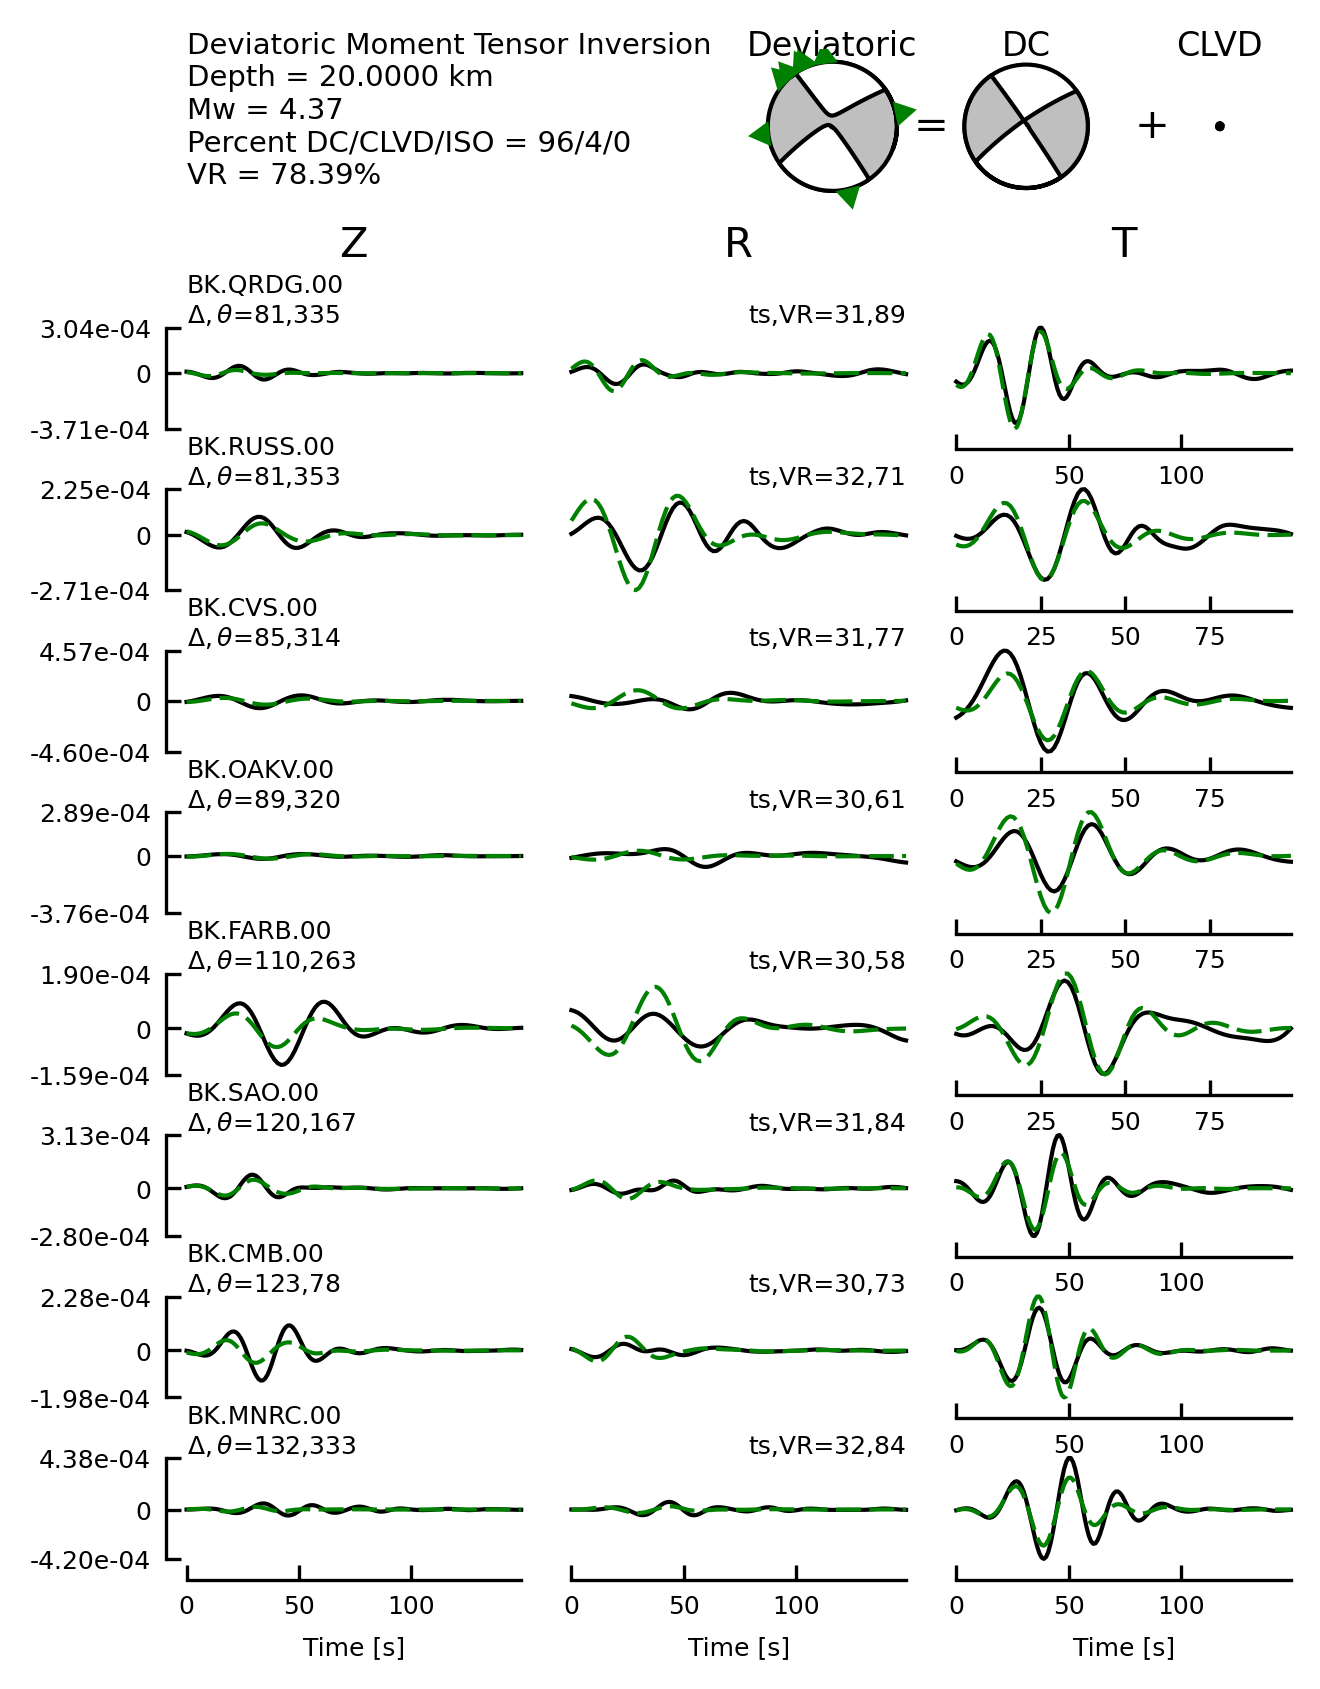

In [5]:
# Or turn on interactive display when you call the plotting function
tdmt.plot(show=True)

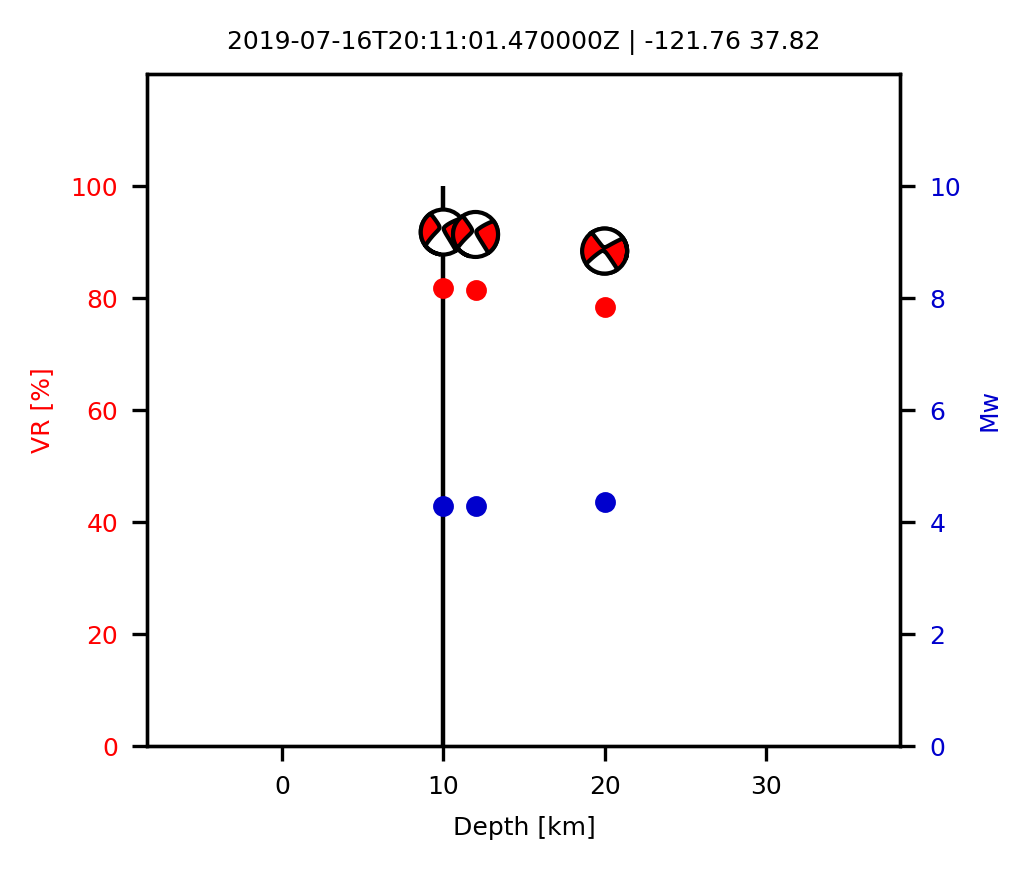

In [5]:
# You can also view the results as a function of source depth
tdmt.plot(view="depth",show=True)

In [7]:
# Finally save the results to file: d{depth}mtinv.out
# Default is to save all the results
tdmt.write()
!cat d12.0000.mtinv.out

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")

Deviatoric Moment Tensor Inversion
Depth = 12.0000 (km)
Mo = 3.121e+22 (dyne-cm)
Mw = 4.30
Percent DC   =  93
Percent CLVD =   7
Percent ISO  =   0
Fault Plane 1: Strike=234 Dip=73 Rake=-4 
Fault Plane 2: Strike=325 Dip=86 Rake=-163
Percent Variance Reduction = 81.35

Moment Tensor Elements: Aki and Richards Cartesian Coordinates
Mxx        Myy        Mzz        Mxy        Mxz        Myz
-2.673e+22 2.890e+22  -2.171e+21 -9.256e+21 6.300e+21  6.211e+21 

GCMT convention (N-m)
Mrr        Mtt        Mpp        Mrt        Mrp        Mtp
-2.171e+14 -2.673e+15 2.890e+15  6.300e+14  -6.211e+14 9.256e+14 

Eigenvalues: 3.121e+22 -1.088e+21 -3.012e+22
Lune Coordinates: -1.76  0.00  
Station Information
    station  distance  azimuth  ts  npts   dt  Z  R  T weights     VR  longitude  latitude
 BK.QRDG.00     80.99   335.29  31   150  1.0  1  1  1  1.0000  91.35    -122.14     38.48
 BK.RUSS.00     81.16   353.18  32   100  1.0  1  1  1  1.0021  79.29    -121.87     38.54
  BK.CVS.00     84.88   

# Find the best solution
Make some changes to your input file, such as changing the time shifts, removing bad stations, etc. to get a better solution. Check the solution folder 